# **UNIVERSIDAD TORCUATO DI TELLA**
## **MAESTRÍA EN ECONOMETRÍA**

---

### **EXAMEN DE MICROECONOMETRÍA II**

- **Profesor:** González-Rozada, Martín  
- **Ayudante:** Lening, Iara  
- **Alumno:** Guzzi, David Alexander  (Legajo n°: 24H1970, DNI: 37.703.649)  

**Ciclo Lectivo:** Segundo Trimestre, 2025

---

## **Índice.**
- [Ejercicio 1](#ejercicio-1)
- [Ejercicio 2](#ejercicio-2)
- [Ejercicio 3](#ejercicio-3)
- [Ejercicio 4](#ejercicio-4)
- [Ejercicio 5](#ejercicio-5)

### **Configuración inicial.**

In [1]:
# Importar librerías necesarias.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Importar funciones del módulo utils.
from utils import (
    # Generación de datos.
    generate_dgp_exercise1,
    generate_dgp_exercise2,
    generate_dgp_exercise3,
    generate_dgp_exercise4,
    # Estimadores.
    estimate_diff_means,
    estimate_ols_ate,
    estimate_psm,
    estimate_2sls,
    estimate_did,
    # Métricas.
    calculate_monte_carlo_stats,
    # Visualización.
    create_results_table,
    plot_estimates_distribution,
    create_comparison_table
)

# Configurar estilo de gráficos.
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Semilla para reproducibilidad.
SEED = int('03649') # DNI: 37.703.649
np.random.seed(SEED)

# Número de replicaciones Monte Carlo.
N_REPLICATIONS = 1000

print("✓ Configuración completada")
print(f"✓ Semilla: {SEED}")
print(f"✓ Replicaciones: {N_REPLICATIONS}")

✓ Configuración completada
✓ Semilla: 3649
✓ Replicaciones: 1000


## **Ejercicio 1.**


### **Ejercicio 1: Diferencia de Medias vs. Regresión OLS.**

**Objetivo:** Comparar el desempeño de estimadores con y sin ajuste por covariables bajo selección sobre observables.

**DGP:**
- $X \sim N(0,1)$
- $D = \mathbb{1}\{X + \epsilon > 0\}$, donde $\epsilon \sim N(0,1)$ (sesgo de selección)
- $Y = 2 + 3D + 2X + u$, donde $u \sim N(0,1)$
- **ATE verdadero = 3**

**Estimadores:**
1. Diferencia en medias (naive): $\hat{\tau}_{DM} = \bar{Y}(D=1) - \bar{Y}(D=0)$
2. OLS ajustado: $Y = \beta_0 + \beta_1 D + \beta_2 X + \varepsilon$, donde $\hat{\tau}_{OLS} = \hat{\beta}_1$

#### **1.1. Simulación con N=100.**

In [2]:
# Simulación Monte Carlo para N=100.
N = 100
TRUE_ATE_EX1 = 3.0

# Almacenar resultados
estimates_dm_100 = []
se_dm_100 = []
estimates_ols_100 = []
se_ols_100 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos.
    seed_r = SEED + r
    data = generate_dgp_exercise1(n=N, seed=seed_r)
    
    # Estimar con diferencia en medias.
    result_dm = estimate_diff_means(data['Y'], data['D'])
    estimates_dm_100.append(result_dm['ate'])
    se_dm_100.append(result_dm['se'])
    
    # Estimar con OLS ajustado.
    result_ols = estimate_ols_ate(data['Y'], data['D'], data['X'])
    estimates_ols_100.append(result_ols['ate'])
    se_ols_100.append(result_ols['se'])

# Convertir a arrays.
estimates_dm_100 = np.array(estimates_dm_100)
se_dm_100 = np.array(se_dm_100)
estimates_ols_100 = np.array(estimates_ols_100)
se_ols_100 = np.array(se_ols_100)

print("✓ Simulación completada para N=100")

Ejecutando 1000 replicaciones para N=100...


100%|██████████| 1000/1000 [00:01<00:00, 750.25it/s]

✓ Simulación completada para N=100


#### **Resultados para N=100.**

In [3]:
# Calcular métricas Monte Carlo.
stats_dm_100 = calculate_monte_carlo_stats(estimates_dm_100, se_dm_100, TRUE_ATE_EX1)
stats_ols_100 = calculate_monte_carlo_stats(estimates_ols_100, se_ols_100, TRUE_ATE_EX1)

# Crear tabla de resultados.
results_ex1_n100 = {
    'Diferencia en medias': stats_dm_100,
    'OLS ajustado': stats_ols_100
}

table_ex1_n100 = create_results_table(results_ex1_n100)
print("\nRESULTADOS EJERCICIO 1 (N=100)")
print("="*80)
print(table_ex1_n100.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 1 (N=100)
           Estimador  Verdadero  Media   Sesgo  Varianza    MSE  Cobertura    R
        OLS ajustado        3.0 2.9894 -0.0106    0.0600 0.0601      0.946 1000
Diferencia en medias        3.0 5.2446  2.2446    0.1555 5.1937      0.000 1000


#### **1.2. Simulación con N=200.**

In [4]:
# Simulación Monte Carlo para N=200.
N = 200

# Almacenar resultados.
estimates_dm_200 = []
se_dm_200 = []
estimates_ols_200 = []
se_ols_200 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos
    seed_r = SEED + 10000 + r  # Offset para evitar solapamiento con N=100.
    data = generate_dgp_exercise1(n=N, seed=seed_r)
    
    # Estimar con diferencia en medias.
    result_dm = estimate_diff_means(data['Y'], data['D'])
    estimates_dm_200.append(result_dm['ate'])
    se_dm_200.append(result_dm['se'])
    
    # Estimar con OLS ajustado.
    result_ols = estimate_ols_ate(data['Y'], data['D'], data['X'])
    estimates_ols_200.append(result_ols['ate'])
    se_ols_200.append(result_ols['se'])

# Convertir a arrays.
estimates_dm_200 = np.array(estimates_dm_200)
se_dm_200 = np.array(se_dm_200)
estimates_ols_200 = np.array(estimates_ols_200)
se_ols_200 = np.array(se_ols_200)

print("✓ Simulación completada para N=200")

Ejecutando 1000 replicaciones para N=200...


100%|██████████| 1000/1000 [00:01<00:00, 729.12it/s]

✓ Simulación completada para N=200


#### **Resultados para N=200.**

In [5]:
# Calcular métricas Monte Carlo.
stats_dm_200 = calculate_monte_carlo_stats(estimates_dm_200, se_dm_200, TRUE_ATE_EX1)
stats_ols_200 = calculate_monte_carlo_stats(estimates_ols_200, se_ols_200, TRUE_ATE_EX1)

# Crear tabla de resultados.
results_ex1_n200 = {
    'Diferencia en medias': stats_dm_200,
    'OLS ajustado': stats_ols_200
}

table_ex1_n200 = create_results_table(results_ex1_n200)
print("\nRESULTADOS EJERCICIO 1 (N=200)")
print("="*80)
print(table_ex1_n200.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 1 (N=200)
           Estimador  Verdadero  Media   Sesgo  Varianza    MSE  Cobertura    R
        OLS ajustado        3.0 2.9909 -0.0091     0.029 0.0291      0.964 1000
Diferencia en medias        3.0 5.2540  2.2540     0.070 5.1503      0.000 1000


#### **1.3. Visualización de resultados.**

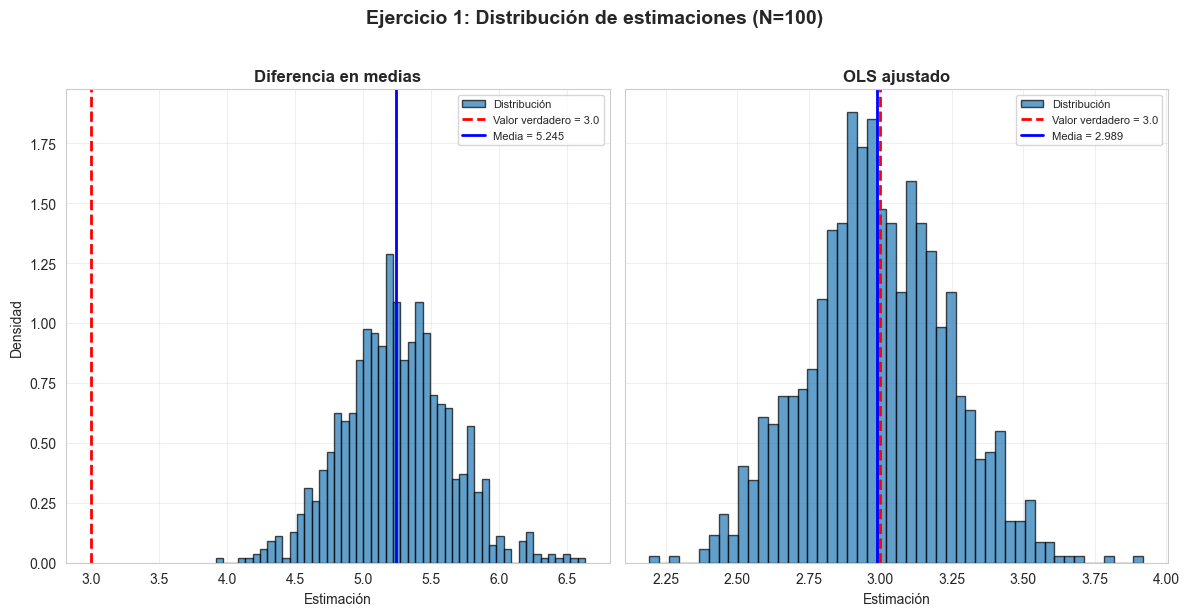

In [6]:
# Graficar distribuciones para N=100.
estimates_dict_100 = {
    'Diferencia en medias': estimates_dm_100,
    'OLS ajustado': estimates_ols_100
}

fig1 = plot_estimates_distribution(
    estimates_dict_100, 
    TRUE_ATE_EX1, 
    title='Ejercicio 1: Distribución de estimaciones (N=100)'
)
plt.show()

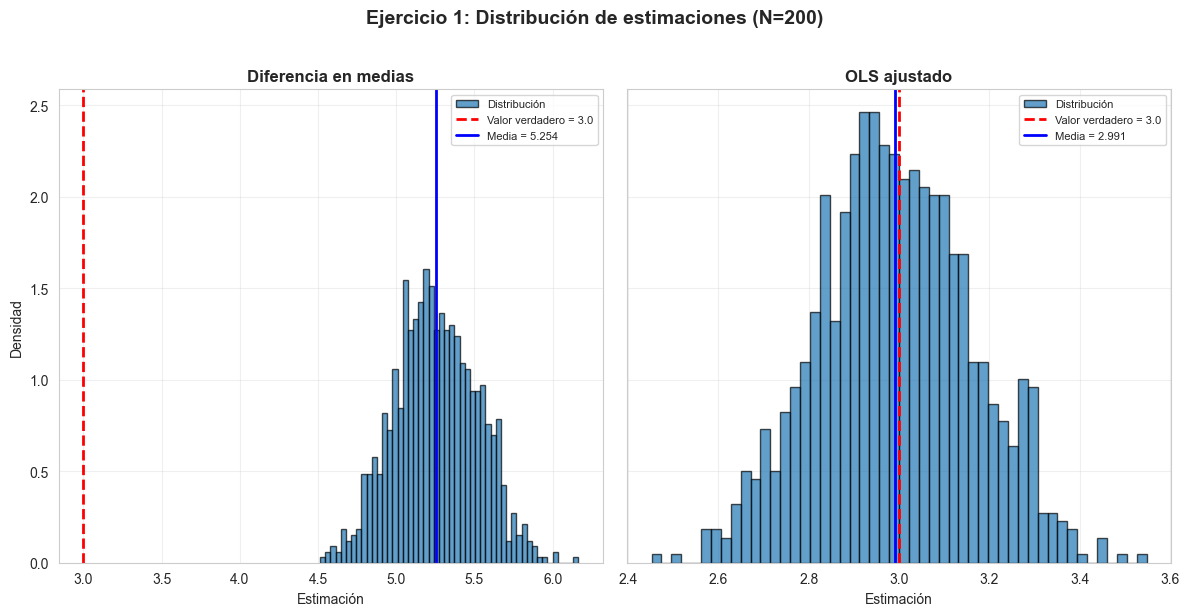

In [7]:
# Graficar distribuciones para N=200.
estimates_dict_200 = {
    'Diferencia en medias': estimates_dm_200,
    'OLS ajustado': estimates_ols_200
}

fig2 = plot_estimates_distribution(
    estimates_dict_200, 
    TRUE_ATE_EX1, 
    title='Ejercicio 1: Distribución de estimaciones (N=200)'
)
plt.show()

## **Ejercicio 2.**

### **Ejercicio 2: Propensity Score Matching (PSM).**

**Objetivo:** Examinar el desempeño de estimadores de emparejamiento bajo independencia condicional.

**DGP:**
- $X_1 \sim N(0,1)$, $X_2 \sim \text{Bernoulli}(0.5)$
- $P(D=1|X) = \frac{1}{1+\exp(-(0.5+X_1+2X_2))}$
- $D \sim \text{Bernoulli}(P(D=1|X))$
- $Y = 1 + 4D + X_1 + 3X_2 + u$, donde $u \sim N(0,1)$
- **ATE verdadero = 4**

**Estimador:** Nearest-neighbor matching 1:1 con reemplazo, usando errores estándar bootstrap (200 réplicas).

#### **2.1. Simulación con N=100.**

In [8]:
# Simulación Monte Carlo para PSM con N=100.
N = 100
TRUE_ATE_EX2 = 4.0
N_BOOTSTRAP = 200

# Almacenar resultados.
estimates_psm_100 = []
se_psm_100 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con PSM para N={N}...")
print(f"(Cada replicación incluye {N_BOOTSTRAP} bootstraps, puede tardar)")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos.
    seed_r = SEED + 20000 + r
    data = generate_dgp_exercise2(n=N, seed=seed_r)
    
    # Estimar con PSM
    result_psm = estimate_psm(
        data['Y'], 
        data['D'], 
        data['X1'], 
        data['X2'],
        n_bootstrap=N_BOOTSTRAP,
        seed=seed_r
    )
    
    estimates_psm_100.append(result_psm['ate'])
    se_psm_100.append(result_psm['se'])

# Convertir a arrays.
estimates_psm_100 = np.array(estimates_psm_100)
se_psm_100 = np.array(se_psm_100)

print("✓ Simulación PSM completada para N=100")

Ejecutando 1000 replicaciones con PSM para N=100...
(Cada replicación incluye 200 bootstraps, puede tardar)


100%|██████████| 1000/1000 [11:40<00:00,  1.43it/s]

✓ Simulación PSM completada para N=100


#### **Resultados para N=100.**

In [9]:
# Calcular métricas Monte Carlo.
stats_psm_100 = calculate_monte_carlo_stats(estimates_psm_100, se_psm_100, TRUE_ATE_EX2)

# Crear tabla de resultados.
results_ex2_n100 = {
    'PSM (NN 1:1 con reemplazo)': stats_psm_100
}

table_ex2_n100 = create_results_table(results_ex2_n100)
print("\nRESULTADOS EJERCICIO 2 (N=100)")
print("="*80)
print(table_ex2_n100.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 2 (N=100)
                 Estimador  Verdadero  Media  Sesgo  Varianza    MSE  Cobertura    R
PSM (NN 1:1 con reemplazo)        4.0 4.2302 0.2302     0.357 0.4096      0.884 1000


#### **2.2. Simulación con N=200.**

In [10]:
# Simulación Monte Carlo para PSM con N=200.
N = 200

# Almacenar resultados.
estimates_psm_200 = []
se_psm_200 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con PSM para N={N}...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos.
    seed_r = SEED + 30000 + r
    data = generate_dgp_exercise2(n=N, seed=seed_r)
    
    # Estimar con PSM.
    result_psm = estimate_psm(
        data['Y'], 
        data['D'], 
        data['X1'], 
        data['X2'],
        n_bootstrap=N_BOOTSTRAP,
        seed=seed_r
    )
    
    estimates_psm_200.append(result_psm['ate'])
    se_psm_200.append(result_psm['se'])

# Convertir a arrays.
estimates_psm_200 = np.array(estimates_psm_200)
se_psm_200 = np.array(se_psm_200)

print("✓ Simulación PSM completada para N=200")

Ejecutando 1000 replicaciones con PSM para N=200...


100%|██████████| 1000/1000 [14:07<00:00,  1.18it/s]

✓ Simulación PSM completada para N=200


#### **Resultados para N=200.**

In [11]:
# Calcular métricas Monte Carlo.
stats_psm_200 = calculate_monte_carlo_stats(estimates_psm_200, se_psm_200, TRUE_ATE_EX2)

# Crear tabla de resultados.
results_ex2_n200 = {
    'PSM (NN 1:1 con reemplazo)': stats_psm_200
}

table_ex2_n200 = create_results_table(results_ex2_n200)
print("\nRESULTADOS EJERCICIO 2 (N=200)")
print("="*80)
print(table_ex2_n200.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 2 (N=200)
                 Estimador  Verdadero  Media  Sesgo  Varianza    MSE  Cobertura    R
PSM (NN 1:1 con reemplazo)        4.0 4.1293 0.1293    0.1493 0.1658      0.905 1000


#### **2.3 Visualización de resultados.**

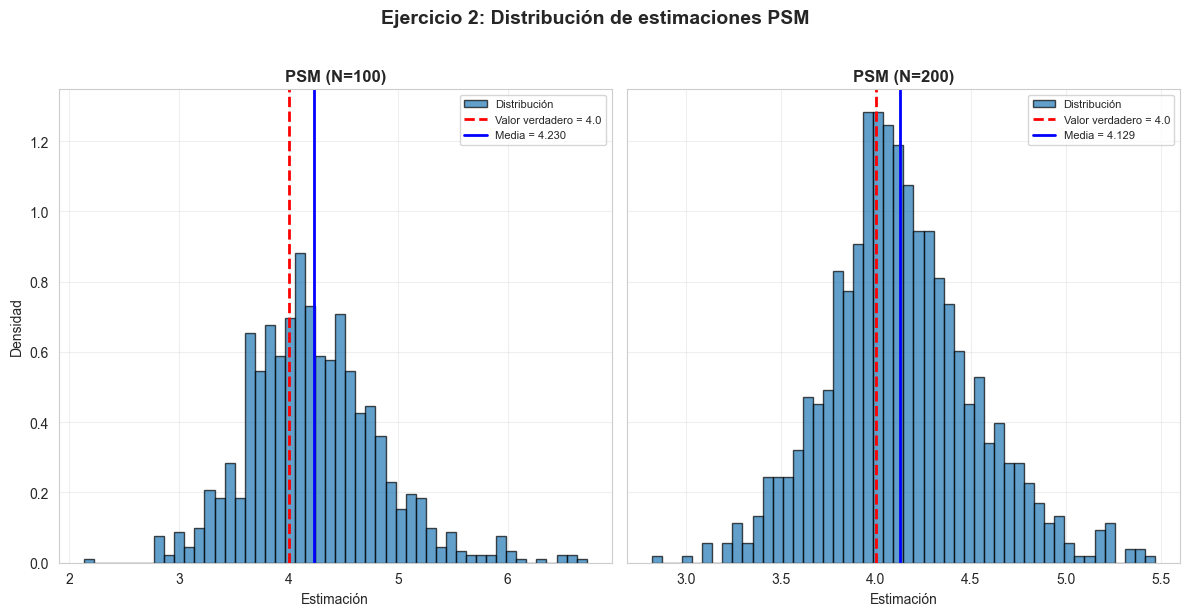

In [12]:
# Graficar distribuciones para N=100 y N=200.
estimates_dict_psm_100 = {
    'PSM (N=100)': estimates_psm_100
}

estimates_dict_psm_200 = {
    'PSM (N=200)': estimates_psm_200
}

# Combinar ambas distribuciones.
estimates_dict_psm = {
    'PSM (N=100)': estimates_psm_100,
    'PSM (N=200)': estimates_psm_200
}

fig_psm = plot_estimates_distribution(
    estimates_dict_psm, 
    TRUE_ATE_EX2, 
    title='Ejercicio 2: Distribución de estimaciones PSM'
)
plt.show()

## **Ejercicio 3.**

### **Ejercicio 3: Variables Instrumentales (IV).**

**Objetivo:** Simular problemas de instrumentos débiles y 2SLS en muestras pequeñas.

**DGP:**
- $Z \sim \text{Bernoulli}(0.5)$ (instrumento)
- $X \sim N(0,1)$ (covariable)
- $D = 0.2 + \gamma Z + 0.5X + v$, donde $v \sim N(0,1)$
  - Instrumento **fuerte**: $\gamma = 0.3$
  - Instrumento **débil**: $\gamma = 0.05$
- $u = 0.8v + \varepsilon$, donde $\varepsilon \sim N(0,1)$ (endogeneidad)
- $Y = 5 + 2D + X + u$
- **ATE verdadero = 2**

**Estimadores:**
1. OLS naive (sesgado)
2. 2SLS con instrumento fuerte
3. 2SLS con instrumento débil

#### **3.1. Simulación con instrumento fuerte (N=100).**

In [13]:
# Simulación Monte Carlo para IV con N=100 (instrumento fuerte).
N = 100
TRUE_ATE_EX3 = 2.0

# Almacenar resultados
estimates_ols_naive = []
se_ols_naive = []
estimates_2sls_strong = []
se_2sls_strong = []
f_stats_strong = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con IV (instrumento fuerte)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con instrumento fuerte.
    seed_r = SEED + 40000 + r
    data = generate_dgp_exercise3(n=N, seed=seed_r, weak_instrument=False)
    
    # Estimar con 2SLS.
    result_iv = estimate_2sls(
        data['Y'],
        data['D'],
        data['Z'],
        data['X']
    )
    
    estimates_ols_naive.append(result_iv['ate_ols'])
    se_ols_naive.append(result_iv['se_ols'])
    estimates_2sls_strong.append(result_iv['ate_2sls'])
    se_2sls_strong.append(result_iv['se_2sls'])
    f_stats_strong.append(result_iv['first_stage_f'])

# Convertir a arrays.
estimates_ols_naive = np.array(estimates_ols_naive)
se_ols_naive = np.array(se_ols_naive)
estimates_2sls_strong = np.array(estimates_2sls_strong)
se_2sls_strong = np.array(se_2sls_strong)
f_stats_strong = np.array(f_stats_strong)

print("✓ Simulación IV (instrumento fuerte) completada")
print(f"  Estadístico F promedio (primera etapa): {f_stats_strong.mean():.2f}")

Ejecutando 1000 replicaciones con IV (instrumento fuerte)...


100%|██████████| 1000/1000 [00:01<00:00, 897.05it/s]

✓ Simulación IV (instrumento fuerte) completada
  Estadístico F promedio (primera etapa): 3.12


#### **3.2. Simulación con instrumento débil (N=100).**

In [14]:
# Simulación Monte Carlo para IV con N=100 (instrumento débil).

# Almacenar resultados.
estimates_2sls_weak = []
se_2sls_weak = []
f_stats_weak = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones con IV (instrumento débil)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con instrumento débil.
    seed_r = SEED + 50000 + r
    data = generate_dgp_exercise3(n=N, seed=seed_r, weak_instrument=True)
    
    # Estimar con 2SLS
    result_iv = estimate_2sls(
        data['Y'],
        data['D'],
        data['Z'],
        data['X']
    )
    
    estimates_2sls_weak.append(result_iv['ate_2sls'])
    se_2sls_weak.append(result_iv['se_2sls'])
    f_stats_weak.append(result_iv['first_stage_f'])

# Convertir a arrays.
estimates_2sls_weak = np.array(estimates_2sls_weak)
se_2sls_weak = np.array(se_2sls_weak)
f_stats_weak = np.array(f_stats_weak)

print("✓ Simulación IV (instrumento débil) completada")
print(f"  Estadístico F promedio (primera etapa): {f_stats_weak.mean():.2f}")

Ejecutando 1000 replicaciones con IV (instrumento débil)...


100%|██████████| 1000/1000 [00:01<00:00, 886.90it/s]

✓ Simulación IV (instrumento débil) completada
  Estadístico F promedio (primera etapa): 1.12


#### **Resultados para N=100.**

In [15]:
# Calcular métricas Monte Carlo para todos los estimadores IV.
stats_ols_naive = calculate_monte_carlo_stats(estimates_ols_naive, se_ols_naive, TRUE_ATE_EX3)
stats_2sls_strong = calculate_monte_carlo_stats(estimates_2sls_strong, se_2sls_strong, TRUE_ATE_EX3)
stats_2sls_weak = calculate_monte_carlo_stats(estimates_2sls_weak, se_2sls_weak, TRUE_ATE_EX3)

# Crear tabla de resultados.
results_ex3 = {
    'OLS naive (sesgado)': stats_ols_naive,
    '2SLS (instrumento fuerte)': stats_2sls_strong,
    '2SLS (instrumento débil)': stats_2sls_weak
}

table_ex3 = create_results_table(results_ex3)
print("\nRESULTADOS EJERCICIO 3 (N=100)")
print("="*80)
print(table_ex3.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 3 (N=100)
                Estimador  Verdadero  Media   Sesgo  Varianza      MSE  Cobertura    R
      OLS naive (sesgado)        2.0 2.7775  0.7775    0.0108   0.6153      0.000 1000
2SLS (instrumento fuerte)        2.0 1.7227 -0.2773   36.2040  36.2446      0.946 1000
 2SLS (instrumento débil)        2.0 3.7856  1.7856  212.5505 215.5264      0.953 1000


#### **3.3 Visualización de resultados.**

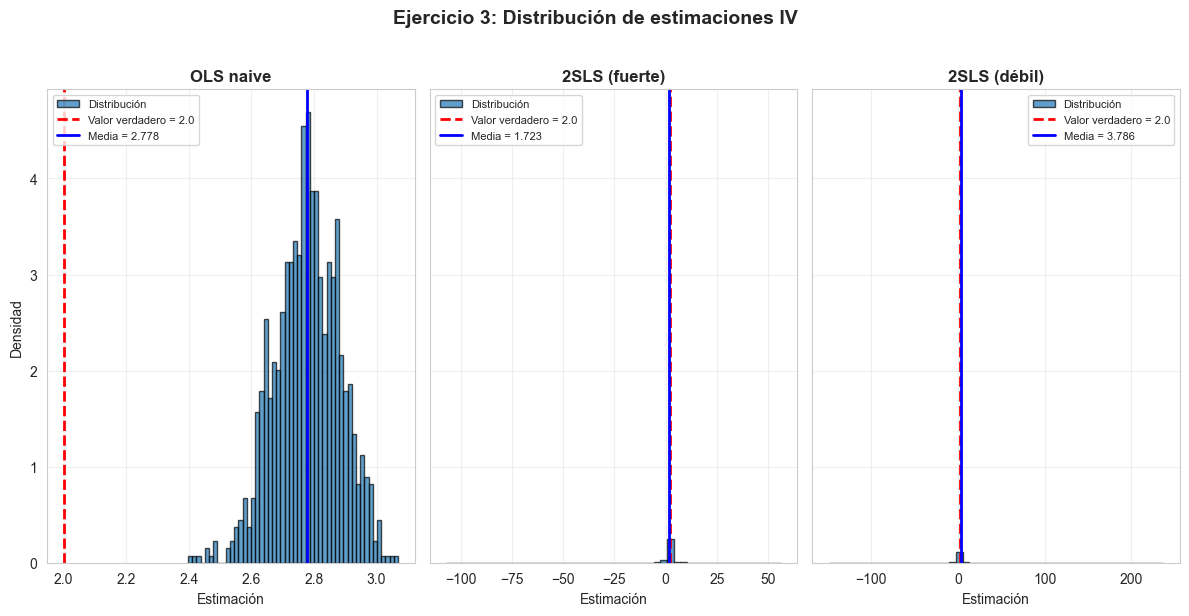

In [16]:
# Graficar distribuciones de los estimadores IV.
estimates_dict_iv = {
    'OLS naive': estimates_ols_naive,
    '2SLS (fuerte)': estimates_2sls_strong,
    '2SLS (débil)': estimates_2sls_weak
}

fig_iv = plot_estimates_distribution(
    estimates_dict_iv, 
    TRUE_ATE_EX3, 
    title='Ejercicio 3: Distribución de estimaciones IV'
)
plt.show()

## **Ejercicio 4.**

### **Ejercicio 4: Diferencia-en-Diferencias (DID).**

**Objetivo:** Evaluar violaciones del supuesto de tendencias paralelas en muestras pequeñas.

**DGP (Panel 2 períodos):**
- $N=100$ unidades, $T=2$ períodos
- $\alpha_i \sim N(0,1)$ (efectos fijos)
- $X_{it} \sim N(0,1)$
- $D_{it} = 1$ si unidad está en grupo tratamiento y $t=2$
- **Sin violación**: $\lambda_t = 0$ para todos
- **Con violación**: $\lambda_t = 0.5t$ para tratados, $0$ para control (pre-tendencia)
- $Y_{it} = \alpha_i + \lambda_t + 1.5 D_{it} + 2X_{it} + u_{it}$
- **ATT verdadero = 1.5**

**Estimador:** DID con regresión y errores clustered a nivel de unidad.

#### **4.1. Simulación sin violación de tendencias paralelas.**

In [17]:
# Simulación Monte Carlo para DID sin violación (N=100 unidades).
N = 100
TRUE_ATT_EX4 = 1.5

# Almacenar resultados
estimates_did_simple_base = []
se_did_simple_base = []
estimates_did_reg_base = []
se_did_reg_base = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (sin violación)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos sin violación.
    seed_r = SEED + 60000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=False)
    
    # Estimar DID
    result_did = estimate_did(df)
    
    estimates_did_simple_base.append(result_did['att_simple'])
    se_did_simple_base.append(result_did['se_simple'])
    estimates_did_reg_base.append(result_did['att_regression'])
    se_did_reg_base.append(result_did['se_regression'])

# Convertir a arrays.
estimates_did_simple_base = np.array(estimates_did_simple_base)
se_did_simple_base = np.array(se_did_simple_base)
estimates_did_reg_base = np.array(estimates_did_reg_base)
se_did_reg_base = np.array(se_did_reg_base)

print("✓ Simulación DID (sin violación) completada")

Ejecutando 1000 replicaciones DID (sin violación)...


100%|██████████| 1000/1000 [00:09<00:00, 103.33it/s]

✓ Simulación DID (sin violación) completada


#### **4.2. Simulación con violación de tendencias paralelas.**

In [18]:
# Simulación Monte Carlo para DID con violación (N=100 unidades).

# Almacenar resultados.
estimates_did_simple_viol = []
se_did_simple_viol = []
estimates_did_reg_viol = []
se_did_reg_viol = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (con violación)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con violación.
    seed_r = SEED + 70000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=True)
    
    # Estimar DID.
    result_did = estimate_did(df)
    
    estimates_did_simple_viol.append(result_did['att_simple'])
    se_did_simple_viol.append(result_did['se_simple'])
    estimates_did_reg_viol.append(result_did['att_regression'])
    se_did_reg_viol.append(result_did['se_regression'])

# Convertir a arrays.
estimates_did_simple_viol = np.array(estimates_did_simple_viol)
se_did_simple_viol = np.array(se_did_simple_viol)
estimates_did_reg_viol = np.array(estimates_did_reg_viol)
se_did_reg_viol = np.array(se_did_reg_viol)

print("✓ Simulación DID (con violación) completada")

Ejecutando 1000 replicaciones DID (con violación)...


100%|██████████| 1000/1000 [00:09<00:00, 105.84it/s]

✓ Simulación DID (con violación) completada


#### **Resultados para N=100.**

In [19]:
# Calcular métricas Monte Carlo para ambos métodos.

# Método simple (sin controles).
stats_did_simple_base = calculate_monte_carlo_stats(
    estimates_did_simple_base, 
    se_did_simple_base, 
    TRUE_ATT_EX4
)

stats_did_simple_viol = calculate_monte_carlo_stats(
    estimates_did_simple_viol, 
    se_did_simple_viol, 
    TRUE_ATT_EX4
)

# Método con regresión (con controles).
stats_did_reg_base = calculate_monte_carlo_stats(
    estimates_did_reg_base, 
    se_did_reg_base, 
    TRUE_ATT_EX4
)

stats_did_reg_viol = calculate_monte_carlo_stats(
    estimates_did_reg_viol, 
    se_did_reg_viol, 
    TRUE_ATT_EX4
)

# Crear tabla de resultados.
results_ex4 = {
    'DID simple (tendencias OK)': stats_did_simple_base,
    'DID regresión (tendencias OK)': stats_did_reg_base,
    'DID simple (violación)': stats_did_simple_viol,
    'DID regresión (violación)': stats_did_reg_viol
}

table_ex4 = create_results_table(results_ex4)
print("\nRESULTADOS EJERCICIO 4 (N=100 unidades)")
print("="*80)
print(table_ex4.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 4 (N=100 unidades)
                    Estimador  Verdadero  Media  Sesgo  Varianza    MSE  Cobertura    R
DID regresión (tendencias OK)        1.5 1.5069 0.0069    0.0837 0.0837      0.951 1000
    DID regresión (violación)        1.5 1.9954 0.4954    0.0838 0.3291      0.575 1000
   DID simple (tendencias OK)        1.5 1.5186 0.0186    0.3962 0.3961      0.948 1000
       DID simple (violación)        1.5 2.0177 0.5177    0.3788 0.6464      0.874 1000


#### **4.3 Visualización de resultados.**

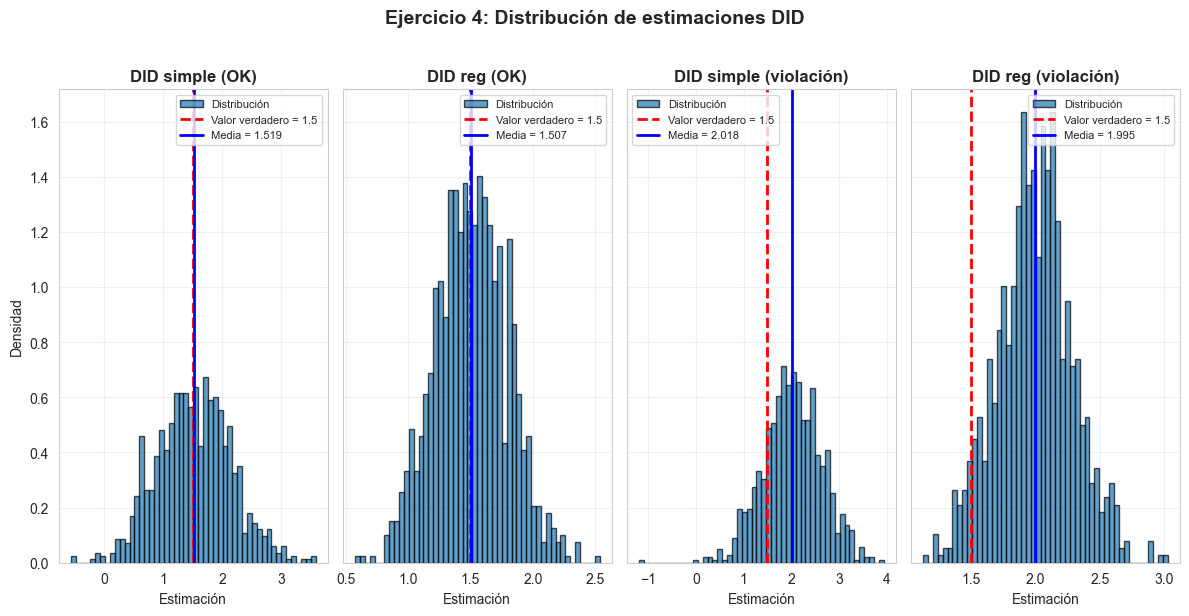

In [20]:
# Graficar distribuciones de los estimadores DID.
estimates_dict_did = {
    'DID simple (OK)': estimates_did_simple_base,
    'DID reg (OK)': estimates_did_reg_base,
    'DID simple (violación)': estimates_did_simple_viol,
    'DID reg (violación)': estimates_did_reg_viol
}

fig_did = plot_estimates_distribution(
    estimates_dict_did, 
    TRUE_ATT_EX4, 
    title='Ejercicio 4: Distribución de estimaciones DID'
)
plt.show()

#### **4.4. Simulación sin violación (N=500).**

In [21]:
# Simulación Monte Carlo para DID sin violación (N=500 unidades).
N = 500

# Almacenar resultados
estimates_did_simple_base_500 = []
se_did_simple_base_500 = []
estimates_did_reg_base_500 = []
se_did_reg_base_500 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (sin violación, N=500)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos sin violación.
    seed_r = SEED + 80000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=False)
    
    # Estimar DID
    result_did = estimate_did(df)
    
    estimates_did_simple_base_500.append(result_did['att_simple'])
    se_did_simple_base_500.append(result_did['se_simple'])
    estimates_did_reg_base_500.append(result_did['att_regression'])
    se_did_reg_base_500.append(result_did['se_regression'])

# Convertir a arrays.
estimates_did_simple_base_500 = np.array(estimates_did_simple_base_500)
se_did_simple_base_500 = np.array(se_did_simple_base_500)
estimates_did_reg_base_500 = np.array(estimates_did_reg_base_500)
se_did_reg_base_500 = np.array(se_did_reg_base_500)

print("✓ Simulación DID (sin violación, N=500) completada")

Ejecutando 1000 replicaciones DID (sin violación, N=500)...


100%|██████████| 1000/1000 [00:14<00:00, 69.53it/s]

✓ Simulación DID (sin violación, N=500) completada


#### **4.5. Simulación con violación (N=500).**

In [22]:
# Simulación Monte Carlo para DID con violación (N=500 unidades).

# Almacenar resultados.
estimates_did_simple_viol_500 = []
se_did_simple_viol_500 = []
estimates_did_reg_viol_500 = []
se_did_reg_viol_500 = []

print(f"Ejecutando {N_REPLICATIONS} replicaciones DID (con violación, N=500)...")

for r in tqdm(range(N_REPLICATIONS)):
    # Generar datos con violación.
    seed_r = SEED + 90000 + r
    df = generate_dgp_exercise4(n=N, seed=seed_r, violate_parallel_trends=True)
    
    # Estimar DID.
    result_did = estimate_did(df)
    
    estimates_did_simple_viol_500.append(result_did['att_simple'])
    se_did_simple_viol_500.append(result_did['se_simple'])
    estimates_did_reg_viol_500.append(result_did['att_regression'])
    se_did_reg_viol_500.append(result_did['se_regression'])

# Convertir a arrays.
estimates_did_simple_viol_500 = np.array(estimates_did_simple_viol_500)
se_did_simple_viol_500 = np.array(se_did_simple_viol_500)
estimates_did_reg_viol_500 = np.array(estimates_did_reg_viol_500)
se_did_reg_viol_500 = np.array(se_did_reg_viol_500)

print("✓ Simulación DID (con violación, N=500) completada")

Ejecutando 1000 replicaciones DID (con violación, N=500)...


100%|██████████| 1000/1000 [00:15<00:00, 65.83it/s]

✓ Simulación DID (con violación, N=500) completada


#### **Resultados para N=500.**

In [23]:
# Calcular métricas Monte Carlo para ambos métodos (N=500).

# Método simple (sin controles).
stats_did_simple_base_500 = calculate_monte_carlo_stats(
    estimates_did_simple_base_500, 
    se_did_simple_base_500, 
    TRUE_ATT_EX4
)

stats_did_simple_viol_500 = calculate_monte_carlo_stats(
    estimates_did_simple_viol_500, 
    se_did_simple_viol_500, 
    TRUE_ATT_EX4
)

# Método con regresión (con controles).
stats_did_reg_base_500 = calculate_monte_carlo_stats(
    estimates_did_reg_base_500, 
    se_did_reg_base_500, 
    TRUE_ATT_EX4
)

stats_did_reg_viol_500 = calculate_monte_carlo_stats(
    estimates_did_reg_viol_500, 
    se_did_reg_viol_500, 
    TRUE_ATT_EX4
)

# Crear tabla de resultados.
results_ex4_n500 = {
    'DID simple (tendencias OK)': stats_did_simple_base_500,
    'DID regresión (tendencias OK)': stats_did_reg_base_500,
    'DID simple (violación)': stats_did_simple_viol_500,
    'DID regresión (violación)': stats_did_reg_viol_500
}

table_ex4_n500 = create_results_table(results_ex4_n500)
print("\nRESULTADOS EJERCICIO 4 (N=500 unidades)")
print("="*80)
print(table_ex4_n500.to_string(index=False))
print("="*80)


RESULTADOS EJERCICIO 4 (N=500 unidades)
                    Estimador  Verdadero  Media   Sesgo  Varianza    MSE  Cobertura    R
DID regresión (tendencias OK)        1.5 1.4975 -0.0025    0.0161 0.0161      0.953 1000
   DID simple (tendencias OK)        1.5 1.5024  0.0024    0.0762 0.0761      0.950 1000
    DID regresión (violación)        1.5 2.0040  0.5040    0.0148 0.2689      0.023 1000
       DID simple (violación)        1.5 2.0042  0.5042    0.0792 0.3334      0.573 1000


#### **4.6. Visualización de resultados (N=500).**

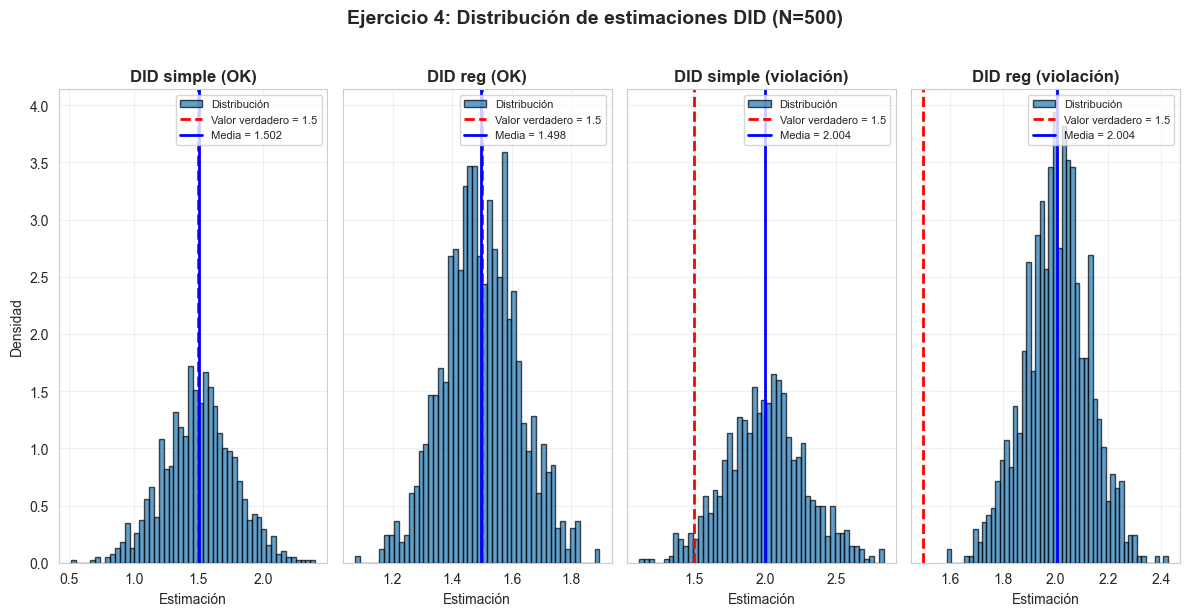

In [24]:
# Graficar distribuciones de los estimadores DID (N=500).
estimates_dict_did_500 = {
    'DID simple (OK)': estimates_did_simple_base_500,
    'DID reg (OK)': estimates_did_reg_base_500,
    'DID simple (violación)': estimates_did_simple_viol_500,
    'DID reg (violación)': estimates_did_reg_viol_500
}

fig_did_500 = plot_estimates_distribution(
    estimates_dict_did_500, 
    TRUE_ATT_EX4, 
    title='Ejercicio 4: Distribución de estimaciones DID (N=500)'
)
plt.show()

## **Ejercicio 5.**

### **Ejercicio 5: Síntesis y Comparación.**

**Objetivo:** Comparar todos los estimadores en términos de propiedades de muestra finita.

#### **5.1. Tabla comparativa consolidada (N=100).**

In [25]:
# Consolidar todos los resultados para N=100.
all_results = {
    'Ejercicio 1': {
        'Diferencia en medias': stats_dm_100,
        'OLS ajustado': stats_ols_100
    },
    'Ejercicio 2': {
        'PSM': stats_psm_100
    },
    'Ejercicio 3': {
        'OLS naive': stats_ols_naive,
        '2SLS fuerte': stats_2sls_strong,
        '2SLS débil': stats_2sls_weak
    },
    'Ejercicio 4': {
        'DID simple (OK)': stats_did_simple_base,
        'DID reg (OK)': stats_did_reg_base,
        'DID simple (violación)': stats_did_simple_viol,
        'DID reg (violación)': stats_did_reg_viol
    }
}

# Crear tabla consolidada.
tabla_final = create_comparison_table(all_results)
print("\n" + "="*100)
print("TABLA COMPARATIVA FINAL - TODOS LOS ESTIMADORES (N=100)")
print("="*100)
print(tabla_final.to_string(index=False))
print("="*100)


TABLA COMPARATIVA FINAL - TODOS LOS ESTIMADORES (N=100)
  Ejercicio              Estimador  Verdadero  Media   Sesgo  Varianza      MSE  Cobertura
Ejercicio 1   Diferencia en medias        3.0 5.2446  2.2446    0.1555   5.1937      0.000
Ejercicio 1           OLS ajustado        3.0 2.9894 -0.0106    0.0600   0.0601      0.946
Ejercicio 2                    PSM        4.0 4.2302  0.2302    0.3570   0.4096      0.884
Ejercicio 3              OLS naive        2.0 2.7775  0.7775    0.0108   0.6153      0.000
Ejercicio 3            2SLS fuerte        2.0 1.7227 -0.2773   36.2040  36.2446      0.946
Ejercicio 3             2SLS débil        2.0 3.7856  1.7856  212.5505 215.5264      0.953
Ejercicio 4        DID simple (OK)        1.5 1.5186  0.0186    0.3962   0.3961      0.948
Ejercicio 4           DID reg (OK)        1.5 1.5069  0.0069    0.0837   0.0837      0.951
Ejercicio 4 DID simple (violación)        1.5 2.0177  0.5177    0.3788   0.6464      0.874
Ejercicio 4    DID reg (violación